In [1]:
import metapypulation.subpopulation
import metapypulation.individual
from  metapypulation.simulation import Simulation
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from metapypulation.metapopulation import Metapopulation


In [6]:

# migrations = np.genfromtxt('./configs/island_model.csv', delimiter=',')

# migrations = migrations

metapop = Metapopulation(4, "axelrod_interaction", migration_matrix = 'island', carrying_capacities=1000)
metapop.populate()

In [7]:
metapop.migration_matrix

'island'

In [3]:
for t in range(200000):
    if t%100000 == 0:
        print(f"Gen {t}!")
        for subpopulation in metapop.subpopulations:
            print(f"The current size of pop {subpopulation.id} is {subpopulation.get_population_size()}")
            sub_id = []
            for ind in subpopulation.population.individuals:
                sub_id.append(ind.original_deme_id)
            indexes, counts = np.unique(sub_id, return_counts=True)
            print(f"The current deme index present in population {subpopulation.id} are {indexes} with {counts} counts.")
    
    metapop.migrate()
    metapop.make_interact()

Gen 0!
The current size of pop 0 is 100
The current deme index present in population 0 are [0] with [100] counts.
The current size of pop 1 is 100
The current deme index present in population 1 are [1] with [100] counts.
The current size of pop 2 is 100
The current deme index present in population 2 are [2] with [100] counts.
The current size of pop 3 is 100
The current deme index present in population 3 are [3] with [100] counts.
Gen 100000!
The current size of pop 0 is 103
The current deme index present in population 0 are [0 1 2 3] with [36 24 18 25] counts.
The current size of pop 1 is 102
The current deme index present in population 1 are [0 1 2 3] with [22 22 26 32] counts.
The current size of pop 2 is 95
The current deme index present in population 2 are [0 1 2 3] with [23 23 25 24] counts.
The current size of pop 3 is 100
The current deme index present in population 3 are [0 1 2 3] with [19 31 31 19] counts.


In [2]:
df_SS = pd.read_csv("./Outputs/stepping_stone.csv")
df_SS["means"] = df_SS.mean(axis=1)

df_IM = pd.read_csv("./Outputs/island.csv")
df_IM["means"] = df_IM.mean(axis=1)

Text(0.5, 0, 'Generations (x 1000)')

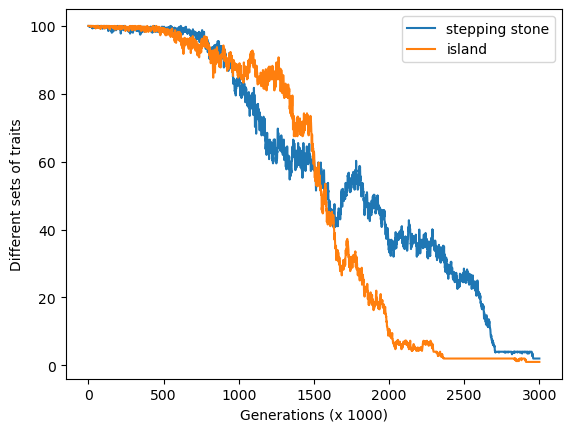

In [3]:
df_SS["means"].plot()
df_IM["means"].plot()
plt.legend(["stepping stone", "island"])
plt.ylabel("Different sets of traits")
plt.xlabel("Generations (x 1000)")

In [2]:
migrations = [[0., 0.001], [0.001, 0.]]
migrations = np.array(migrations)

migrations

array([[0.   , 0.001],
       [0.001, 0.   ]])

In [14]:
sim = Simulation(1000, 10, "stepping_stone", "axelrod_interaction", 100, 2, "test")

In [16]:
sim.migration_matrix

array([[0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.001],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
        0.   ]])

Text(0.5, 1.0, 'Number of unique sets')

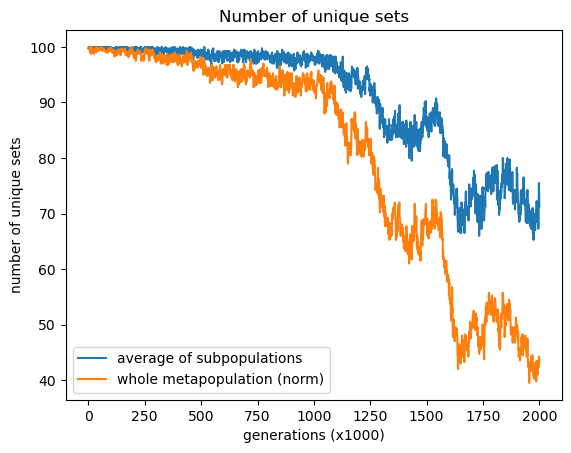

In [15]:
pd.concat([sim.subpop_set_counts, sim.metapop_set_counts/4], axis=1).plot()
plt.legend(["average of subpopulations", "whole metapopulation (norm)"])
plt.xlabel("generations (x1000)")
plt.ylabel("number of unique sets")
plt.title("Number of unique sets")

## Island model VS stepping stone model - 4 subpopulations

Text(0.5, 1.0, 'Total population = 1000, subpopulations = 4')

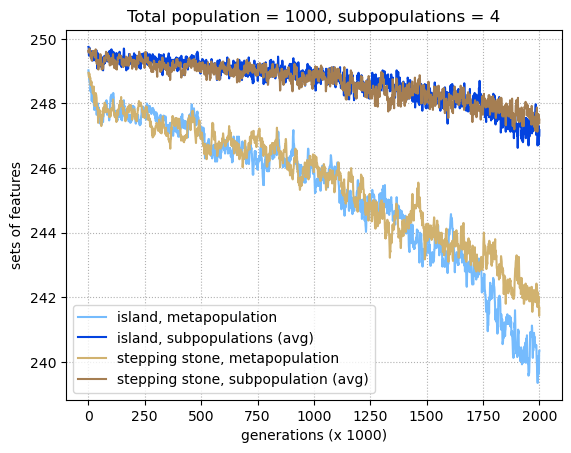

In [101]:
pop = 1000
island_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_metapop_set_counts.csv")#, index_col=0)
stepping_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_metapop_set_counts.csv")#, index_col=0)
island_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_subpop_set_counts.csv")#, index_col=0)
stepping_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_subpop_set_counts.csv")#, index_col=0)
#island_metapop_shannon = pd.read_csv("./Outputs/pop1000/island_model/4subpop_subpop_shannon.csv")
#stepping_metapop_shannon = pd.read_csv("./Outputs/pop1000/stepping_stone/4subpop_subpop_shannon.csv")

for dataset in [island_metapop_counts, stepping_metapop_counts, island_subpop_counts, stepping_subpop_counts]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_counts.mean(axis=1)/4, color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_counts.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_counts.mean(axis=1)/4, color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_counts.mean(axis=1), color='xkcd:puce', linestyle= '-')

# plt.fill_between(island_metapop_counts.index.values, 
#                  island_metapop_counts.mean(axis=1)/4-island_metapop_counts.std(axis=1)/4, 
#                  island_metapop_counts.mean(axis=1)/4+island_metapop_counts.std(axis=1)/4, alpha=0.8)
# plt.fill_between(island_subpop_counts.index.values, 
#                  island_subpop_counts.mean(axis=1)-island_subpop_counts.std(axis=1), 
#                  island_subpop_counts.mean(axis=1)+island_subpop_counts.std(axis=1), alpha=0.8)

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, subpopulations = 4")

Text(0.5, 1.0, 'Total population = 1000, subpopulations = 4')

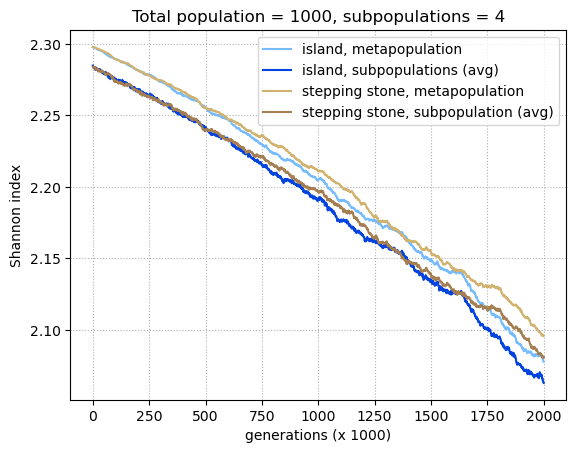

In [104]:
pop = 1000
island_metapop_shannon = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_metapop_shannon.csv")#, index_col=0)
stepping_metapop_shannon = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_metapop_shannon.csv")#, index_col=0)
island_subpop_shannon = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_subpop_shannon.csv")#, index_col=0)
stepping_subpop_shannon = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_subpop_shannon.csv")#, index_col=0)


for dataset in [island_metapop_shannon, stepping_metapop_shannon, island_subpop_shannon, stepping_subpop_shannon]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_shannon.mean(axis=1), color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_shannon.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_shannon.mean(axis=1), color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_shannon.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("Shannon index")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, subpopulations = 4")

## 8 subpopulations

In [ ]:
pop = 400
island_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/island_model/8subpop_metapop_set_counts.csv", index_col=0)
stepping_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_metapop_set_counts.csv", index_col=0)
island_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/island_model/8subpop_subpop_set_counts.csv", index_col=0)
stepping_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_subpop_set_counts.csv", index_col=0)
#island_metapop_shannon = pd.read_csv("./Outputs/pop1000/island_model/4subpop_subpop_shannon.csv")
#stepping_metapop_shannon = pd.read_csv("./Outputs/pop1000/stepping_stone/4subpop_subpop_shannon.csv")

for dataset in [island_metapop_counts, stepping_metapop_counts, island_subpop_counts, stepping_subpop_counts]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_counts.mean(axis=1)/8, color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_counts.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_counts.mean(axis=1)/8, color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_counts.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, 8 subpopulations")